In [1]:
# Digitized EEG channel locations & Preprocessed resting state EEG data:

In [2]:
#IMPORT

import matplotlib
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.interpolate

# Digitized EEG channel locations:

In [3]:
'''
Polhemus PATRIOT Motion Tracking System (Polhemus, Colchester, VT, USA) localizer together 
with the Brainstorm toolbox was used to digitize the exact location of each electrode on a 
participant's head relative to three fiducial points.
'''

"\nPolhemus PATRIOT Motion Tracking System (Polhemus, Colchester, VT, USA) localizer together \nwith the Brainstorm toolbox was used to digitize the exact location of each electrode on a \nparticipant's head relative to three fiducial points.\n"

In [4]:
import scipy.io
study = scipy.io.loadmat('Files/Localized/brainstormstudy.mat')
sub = scipy.io.loadmat('Files/Localized/sub-010005.mat')

In [5]:
print(type(study))
print(type(sub))

<class 'dict'>
<class 'dict'>


In [6]:
HP = {key: sub[key] for key in sub.keys() & {'HeadPoints'}}
Chan = {key: sub[key] for key in sub.keys() & {'Channel'}}

In [7]:
#HEAD POINTS

data1 = list(HP.items())
HP1 = np.array(data1)

print(HP1)
print(HP1.shape)


[['HeadPoints'
  array([[(array([[ 1.05390162e-01, -7.54655022e-04,  1.09510858e-04,
         1.05562767e-01, -5.89822497e-04,  1.23496666e-03],
       [-3.39141038e-04,  7.53056392e-02, -7.50044597e-02,
         3.39141038e-04,  7.49013978e-02, -7.52025773e-02],
       [ 7.42615340e-05, -1.50498157e-04, -4.87955560e-04,
        -7.42615340e-05,  1.50498157e-04,  4.87955560e-04]]), array([[array(['NA'], dtype='<U2'), array(['LPA'], dtype='<U3'),
        array(['RPA'], dtype='<U3'), array(['NA'], dtype='<U2'),
        array(['LPA'], dtype='<U3'), array(['RPA'], dtype='<U3')]],
      dtype=object), array([[array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8')]], dtype=object))]],
      dtype=[('Loc', 'O'), ('Label', 'O'), ('Type', 'O')])]]
(1, 2)


In [8]:
#Selection
HP2 = HP1[0][1]
print(HP2)

[[(array([[ 1.05390162e-01, -7.54655022e-04,  1.09510858e-04,
         1.05562767e-01, -5.89822497e-04,  1.23496666e-03],
       [-3.39141038e-04,  7.53056392e-02, -7.50044597e-02,
         3.39141038e-04,  7.49013978e-02, -7.52025773e-02],
       [ 7.42615340e-05, -1.50498157e-04, -4.87955560e-04,
        -7.42615340e-05,  1.50498157e-04,  4.87955560e-04]]), array([[array(['NA'], dtype='<U2'), array(['LPA'], dtype='<U3'),
        array(['RPA'], dtype='<U3'), array(['NA'], dtype='<U2'),
        array(['LPA'], dtype='<U3'), array(['RPA'], dtype='<U3')]],
      dtype=object), array([[array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8')]], dtype=object))]]


In [9]:
#Final selected data
HP_Cord = HP2[0][0]
HP_Cord

(array([[ 1.05390162e-01, -7.54655022e-04,  1.09510858e-04,
         1.05562767e-01, -5.89822497e-04,  1.23496666e-03],
       [-3.39141038e-04,  7.53056392e-02, -7.50044597e-02,
         3.39141038e-04,  7.49013978e-02, -7.52025773e-02],
       [ 7.42615340e-05, -1.50498157e-04, -4.87955560e-04,
        -7.42615340e-05,  1.50498157e-04,  4.87955560e-04]]), array([[array(['NA'], dtype='<U2'), array(['LPA'], dtype='<U3'),
        array(['RPA'], dtype='<U3'), array(['NA'], dtype='<U2'),
        array(['LPA'], dtype='<U3'), array(['RPA'], dtype='<U3')]],
      dtype=object), array([[array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8')]], dtype=object))

In [10]:
data = list(Chan.items())
an_array = np.array(data)

print(an_array)

[['Channel'
  array([[(array(['Green_1_FP1'], dtype='<U11'), array([], dtype='<U1'), array(['EEG'], dtype='<U3'), array([[0.11221639],
       [0.03699045],
       [0.0599444 ]]), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8)),
        (array(['Green_2_FP2'], dtype='<U11'), array([], shape=(1, 0), dtype=float64), array(['EEG'], dtype='<U3'), array([[ 0.11411683],
       [-0.03592944],
       [ 0.06041879]]), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64)),
        (array(['Green_3_F7'], dtype='<U10'), array([], shape=(1, 0), dtype=float64), array(['EEG'], dtype='<U3'), array([[0.06099049],
       [0.07887165],
       [0.049688  ]]), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64)),
        (array(['Green_4_F3'], dtype='<U10'), array([], shape=(1, 0), dtype=float64), array(['EEG'], dtype='<U3'), array([[0.06888137],
       [0.05800198],
       [0.10342762]]), array([], shape=(1, 0), dtype=float64)

In [11]:
#Select 3 points
data = an_array[0][1]
data1 = data[0]
print(data1.shape)
print(data1[0])

(63,)
(array(['Green_1_FP1'], dtype='<U11'), array([], dtype='<U1'), array(['EEG'], dtype='<U3'), array([[0.11221639],
       [0.03699045],
       [0.0599444 ]]), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8))


# Preprocessed resting state EEG data:

In [12]:
'''The folder contains preprocessed EEG data files after removing ICA components separately for eyes-closed (EC) 
and eyes-open (EO) conditions. Each participant (N= 202) have 4 files (2 for EC condition and 2 for EO). 
These .set and .fdt files have the following naming structure:

sub-BIDS_condition.fdt (.set)

*condition: eyes closed (EC) or eyes open(EO)
 BIDS number: 6-digit numbers created for data-paper (e.g., sub-010001)'''

'The folder contains preprocessed EEG data files after removing ICA components separately for eyes-closed (EC) \nand eyes-open (EO) conditions. Each participant (N= 202) have 4 files (2 for EC condition and 2 for EO). \nThese .set and .fdt files have the following naming structure:\n\nsub-BIDS_condition.fdt (.set)\n\n*condition: eyes closed (EC) or eyes open(EO)\n BIDS number: 6-digit numbers created for data-paper (e.g., sub-010001)'

In [13]:
import mne
#from mne import io
import scipy

In [14]:
#EEGLAB (.set, .fdt)
dataset = scipy.io.loadmat('Files/Preprocessed/sub-010002_EC.set')

In [15]:
x=mne.io.read_raw_eeglab('Files/Preprocessed/sub-010002_EC.set', preload=True, verbose=True)

Reading Files/Preprocessed/sub-010002_EC.fdt
Reading 0 ... 119344  =      0.000 ...   477.376 secs...


In [16]:
type(x)

mne.io.eeglab.eeglab.RawEEGLAB

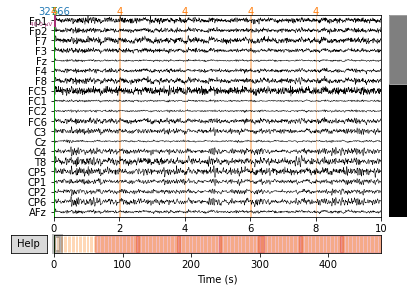

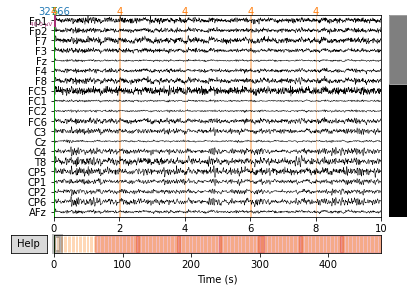

In [17]:
x.plot()

In [18]:
from oct2py import octave
name = 'Files/Preprocessed/sub-010002_EC.set'
EEG = octave.pop_loadset(name)

OSError: octave-cli not found, please see README

In [21]:
# plot first trial of channel 1
import matplotlib.pyplot as plt
plt.plot(x.data[0][0])
plt.show()

AttributeError: 'RawEEGLAB' object has no attribute 'data'